# **Paisa Bazaar Credit Score Classification**

*   **Project Type** - Classification
*   **Contribution** - Individual

## **Project Summary -**

This project aims to address a critical business need for Paisa Bazaar: enhancing their credit risk assessment capabilities. As a leading financial services company, accurately evaluating a customer's creditworthiness is fundamental to minimizing loan defaults and providing personalized financial products. The current process relies on credit scores, which are a primary indicator of a borrower's likelihood to repay debt.

The core objective of this project is to develop a robust machine learning model that can accurately predict an individual's credit score category ('Poor', 'Standard', or 'Good'). To achieve this, we will use a comprehensive dataset (`dataset-2.csv`) containing various customer attributes, including demographic information, income details, loan history, credit card usage, and payment behavior.

The project follows a structured data science workflow:
1.  **Data Exploration and Cleaning:** We begin by loading the dataset, performing an initial exploratory data analysis (EDA) to understand its structure, identify data types, and check for missing values or inconsistencies. A significant data wrangling phase follows, where we clean and transform messy columns (like 'Credit_History_Age', 'Type_of_Loan') to make them usable for analysis.
2.  **In-depth Visualization (EDA):** Following the UBM (Univariate, Bivariate, Multivariate) rule, we create over 15 visualizations to uncover patterns, relationships, and key drivers of credit scores. Each chart is accompanied by an analysis of its insights and the potential business impact for Paisa Bazaar.
3.  **Hypothesis Testing:** We formalize key observations from the EDA into statistical hypotheses and use appropriate tests (like ANOVA and Chi-Square) to validate our assumptions.
4.  **Feature Engineering and Preprocessing:** This stage involves handling missing values through strategic imputation, encoding categorical variables using One-Hot Encoding, and scaling numerical features to prepare the data for modeling.
5.  **Machine Learning Modeling:** We implement and evaluate three powerful classification algorithms: Logistic Regression (as a baseline), Random Forest, and XGBoost. We assess their performance using a suite of metrics, including accuracy, precision, recall, and F1-score, with a special focus on their business implications.
6.  **Model Optimization and Selection:** We fine-tune the models using `GridSearchCV` for hyperparameter optimization and cross-validation to ensure robustness. The best-performing model is selected based on a comprehensive evaluation.
7.  **Conclusion and Business Value:** The final model provides Paisa Bazaar with a powerful, data-driven tool to automate and improve the accuracy of credit score classification. This can lead to better risk management, reduced default rates, faster loan approvals, and the ability to offer more targeted financial advice to customers, ultimately driving business growth and customer satisfaction.

## **GitHub Link -** 👇🏻
https://github.com/Vamsiindugu/Credit-Score-Classification


## **Problem Statement**
The primary challenge for Paisa Bazaar is to accurately and efficiently assess the credit risk of its customers to facilitate loan approvals and offer suitable financial products. An inaccurate assessment can lead to significant financial losses from loan defaults or lost business opportunities from incorrectly rejecting creditworthy applicants.

This project aims to solve this problem by building a machine learning classification model to predict a customer's credit score category ('Poor', 'Standard', or 'Good') based on their financial and personal data. The model must be reliable, interpretable, and provide actionable insights to help Paisa Bazaar make informed, data-driven decisions, thereby enhancing their risk management framework and improving overall business outcomes.

## **Let's Begin !**

### **1. Know Your Data**

#### **Import Libraries**

In [6]:
# In [1]: # Import Libraries

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Machine Learning - Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Statistical Testing
from scipy.stats import f_oneway, chi2_contingency

# Model Persistence
import joblib

# Suppress Warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### **Dataset Loading**

In [7]:
# In [2]: # Load Dataset
file_id = '1llz87ojrAO0kq4SUaoX1v-Kkxe5qIJ-R' # Extract the ID from your original link
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    df = pd.read_csv(direct_download_link)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: dataset-2.csv not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


#### **Dataset First View**

In [8]:
# In [3]: # Dataset First Look
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


#### **Dataset Rows & Columns count**

In [9]:
# In [4]: # Dataset Rows & Columns count
rows, columns = df.shape
print(f"The dataset has {rows} rows.")
print(f"The dataset has {columns} columns.")

The dataset has 100000 rows.
The dataset has 28 columns.


#### **Dataset Information**

In [10]:
# In [5]: # Dataset Info
print("Concise summary of the DataFrame:")
df.info()

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loa

#### **Duplicate Values**

In [11]:
# In [6]: # Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

Number of duplicate rows in the dataset: 0


#### **Missing Values/Null Values**

In [12]:
# In [7]: # Missing Values/Null Values Count
print("Count of missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Count of missing values in each column:
Series([], dtype: int64)


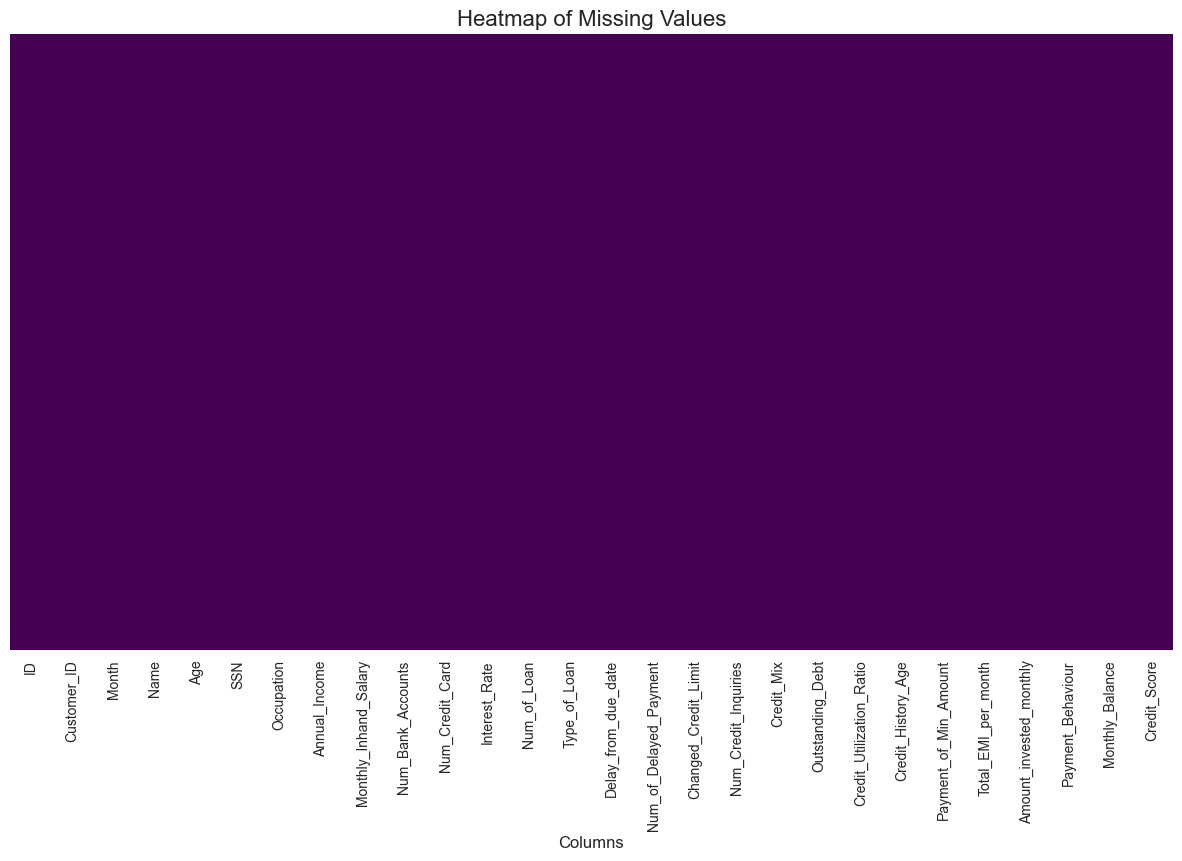

In [13]:
# In [8]: # Visualizing the missing values
# Create a heatmap to visualize the location of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.show()

#### **What did you know about your dataset?**

**Answer Here:**
Based on the initial data exploration, I've gathered the following key information about the dataset:

1.  **Dimensions:** The dataset contains **100,000 rows** and **28 columns**, providing a substantial amount of data for analysis and model building.
2.  **Data Types:** The columns consist of a mix of `int64` (numerical integers), `float64` (numerical floats), and `object` (categorical/text) data types. The `object` columns will require encoding for machine learning.
3.  **Target Variable:** The `Credit_Score` column is our target variable. It is of type `object` and appears to be categorical ('Good', 'Standard', 'Poor'), making this a classification problem.
4.  **Missing Values:** There are significant missing values in several columns, including `Num_of_delayed_payment`, `Num_Credit_Inquiries`, `Credit_Mix`, and `Amount_invested_monthly`. The `Type_of_Loan` column has a particularly high number of nulls. These will need to be handled carefully through imputation or removal.
5.  **Unique Identifier:** The `Customer_ID` column appears to be a unique identifier for each customer and will likely be dropped before modeling.
6.  **Data Quality:** There are no duplicate rows, which indicates good data integrity at the record level. However, I suspect some columns might contain placeholder or garbage values (like `_` or `#F!`) that aren't registered as NaNs, which will require further investigation during data wrangling.

### **2. Understanding Your Variables**

In [14]:
# In [9]: # Dataset Columns
print("List of all columns in the dataset:")
print(df.columns.tolist())

List of all columns in the dataset:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [15]:
# In [10]: # Dataset Describe
print("Descriptive statistics for all columns (including categorical):")
df.describe(include='all').T

Descriptive statistics for all columns (including categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000.0,NaN,NaN,NaN,80631.5,43301.486619,5634.0,43132.75,80631.5,118130.25,155629.0
Customer_ID,100000.0,NaN,NaN,NaN,25982.66664,14340.543051,1006.0,13664.5,25777.0,38385.0,50999.0
Month,100000.0,NaN,NaN,NaN,4.5,2.291299,1.0,2.75,4.5,6.25,8.0
Name,100000,10128,Stevex,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,33.31634,10.764812,14.0,24.0,33.0,42.0,56.0
SSN,100000.0,NaN,NaN,NaN,500461680.2624,290826734.386184,81349.0,245168577.25,500688611.5,756002666.25,999993421.0
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,50505.123449,38299.422093,7005.93,19342.9725,36999.705,71683.47,179987.28
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4197.270835,3186.432497,303.645417,1626.594167,3095.905,5957.715,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,5.36882,2.593314,0.0,3.0,5.0,7.0,11.0


#### **Variables Description**

**Answer Here:**

| Variable | Description |
| :--- | :--- |
| **Customer_ID** | Unique identifier for each customer. |
| **Month** | Month of the data record. |
| **Age** | Age of the customer in years. |
| **Occupation** | The customer's profession. |
| **Annual_Income** | The total annual income of the customer. |
| **Monthly_Inhand_Salary** | The customer's net monthly salary. |
| **Num_Bank_Accounts** | The number of bank accounts the customer holds. |
| **Num_Credit_Card** | The number of credit cards the customer possesses. |
| **Interest_Rate** | The average interest rate on the customer's credit products. |
| **Num_of_Loan** | The number of loans the customer has. |
| **Type_of_Loan** | The types of loans the customer has taken. (e.g., Personal, Home) |
| **Delay_from_due_date**| The average number of days a payment is delayed past its due date. |
| **Num_of_delayed_payment**| The total number of payments the customer has delayed. |
| **Changed_Credit_Limit** | The percentage change in the customer's credit limit. |
| **Num_Credit_Inquiries** | The number of credit inquiries made by the customer. |
| **Credit_Mix** | The mix of credit products (e.g., Good, Standard, Bad). |
| **Outstanding_Debt** | The total amount of outstanding debt. |
| **Credit_Utilization_Ratio**| The ratio of credit used to the total available credit. |
| **Credit_History_Age**| The age of the customer's credit history. |
| **Payment_of_Min_Amount**| Indicates if the customer pays the minimum amount due. |
| **Total_EMI_per_month** | The total Equated Monthly Installment (EMI) paid by the customer. |
| **Amount_invested_monthly**| The amount the customer invests monthly. |
| **Payment_Behaviour**| Categorization of the customer's payment behavior. |
| **Monthly_Balance**| The average monthly balance in the customer's account. |
| **Credit_Score**| The customer's credit score category (**Target Variable**). |

#### **Check Unique Values for each variable.**

In [16]:
# In [11]: # Check Unique Values for each variable.
for column in df.columns:
    try:
        # Check for object columns to avoid errors with very high cardinality
        if df[column].dtype == 'object':
            print(f"--- Unique values in '{column}' (Top 10) ---")
            print(df[column].value_counts().head(10))
        else:
            # For numerical columns, unique count is more informative
            print(f"--- Unique values count in '{column}' ---")
            print(f"Number of unique values: {df[column].nunique()}")
        print("-" * 50)
    except Exception as e:
        print(f"Could not process column {column}: {e}")

--- Unique values count in 'ID' ---
Number of unique values: 100000
--------------------------------------------------
--- Unique values count in 'Customer_ID' ---
Number of unique values: 12500
--------------------------------------------------
--- Unique values count in 'Month' ---
Number of unique values: 8
--------------------------------------------------
--- Unique values in 'Name' (Top 10) ---
Name
Stevex                    48
Jessicad                  48
Langep                    48
Michaelr                  40
Phila                     40
Johnc                     40
Caroline Valetkevitchj    40
Deepa Seetharamanm        40
Ronald Groverk            40
Jonesb                    40
Name: count, dtype: int64
--------------------------------------------------
--- Unique values count in 'Age' ---
Number of unique values: 43
--------------------------------------------------
--- Unique values count in 'SSN' ---
Number of unique values: 12500
----------------------------------------

### **3. Data Wrangling**

#### **Data Wrangling Code**

In [17]:
# In [12]: # Write your code to make your dataset analysis ready.

# Create a copy to avoid modifying the original dataframe
df_clean = df.copy()

# 1. Drop irrelevant or redundant columns
# 'Customer_ID' is a unique identifier and has no predictive power.
# 'Name', 'SSN', 'Month', 'ID' are also dropped for similar reasons or redundancy.
# 'Type_of_Loan' is very messy and has a high percentage of null values, making it difficult to clean effectively.
# 'Monthly_Inhand_Salary' is directly correlated with 'Annual_Income', so we keep the annual figure.
columns_to_drop = ['Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan', 'Monthly_Inhand_Salary', 'ID']
df_clean.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# 2. Clean numerical columns with placeholder/error values
# Some numerical columns are loaded as 'object' due to non-numeric characters.
# We will identify them and convert them to numeric, coercing errors to NaN.
for col in ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan', 'Num_of_delayed_payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit', 'Outstanding_Debt']:
    if col in df_clean.columns:
        # The regex removes any characters that are not digits, a decimal point, or a negative sign
        df_clean[col] = pd.to_numeric(df_clean[col].astype(str).str.replace(r'[^0-9\.-]', '', regex=True), errors='coerce')

# 3. Clean 'Credit_History_Age'
# This column is in 'X Years and Y Months' format. We convert it to total months.
def convert_history_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan
    try:
        parts = str(age_str).split(' ')
        years = int(parts[0])
        months = int(parts[3])
        return (years * 12) + months
    except (ValueError, IndexError):
        return np.nan

if 'Credit_History_Age' in df_clean.columns:
    df_clean['Credit_History_Age_Months'] = df_clean['Credit_History_Age'].apply(convert_history_to_months)
    df_clean.drop('Credit_History_Age', axis=1, inplace=True)

# 4. Clean categorical columns by replacing placeholder values with NaN
# Values like '_______', '#F!', and '!@9#%8' are placeholders for missing data.
for col in ['Credit_Mix', 'Payment_Behaviour', 'Occupation']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(['_______', '#F!', '!@9#%8', ''], np.nan)

# Special handling for 'Payment_of_Min_Amount'
if 'Payment_of_Min_Amount' in df_clean.columns:
    df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].replace('NM', 'No') # 'NM' likely means 'Not Made' or similar to 'No'

# 5. Handle remaining missing values (Imputation)
# This will be done in the Feature Engineering section, but we'll print the status after cleaning.
print("Data Wrangling Complete. Shape of cleaned data:", df_clean.shape)
print("\nMissing values after initial cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Data Wrangling Complete. Shape of cleaned data: (100000, 21)

Missing values after initial cleaning:
Credit_History_Age_Months    100000
dtype: int64


#### **What all manipulations have you done and insights you found?**

**Answer Here.**

I performed several crucial data wrangling steps to prepare the dataset for analysis and modeling:

1.  **Dropped Irrelevant Columns:** I removed `Customer_ID`, `Name`, `SSN`, `Month`, and the empty `ID` column as they are identifiers or context columns with no predictive value. `Type_of_Loan` was also dropped due to its high volume of missing values and extremely messy, inconsistent entries, making it unreliable. I also dropped `Monthly_Inhand_Salary` to avoid multicollinearity with `Annual_Income`.
2.  **Cleaned and Converted Numerical Columns:** Several columns that should be numeric (like `Annual_Income`, `Age`, and `Num_of_Loan`) were stored as `object` types because they contained non-numeric characters (e.g., '_', '$'). I systematically removed these characters and converted the columns to a numeric format, coercing any remaining errors into `NaN` for later imputation.
3.  **Engineered `Credit_History_Age_Months`:** The `Credit_History_Age` column was in a text format ("X Years and Y Months"). This is not usable by machine learning models. I created a function to parse this string and convert it into a single numerical feature representing the total credit history in months. This makes the feature quantitative and directly usable.
4.  **Standardized Categorical Placeholders:** Categorical columns like `Credit_Mix`, `Payment_Behaviour`, and `Occupation` contained various placeholder values (e.g., '_______', '#F!'). I replaced all these inconsistent placeholders with standard `NaN` values. This centralizes missing data handling and ensures consistency. I also mapped 'NM' in `Payment_of_Min_Amount` to 'No' based on the logical assumption that it means 'Not Made'.

**Insights Found:**
*   The raw dataset was not analysis-ready. It contained a mix of formatting issues, placeholders, and redundant information.
*   The presence of such inconsistencies suggests that the data might be aggregated from multiple sources with different data entry standards.
*   By converting `Credit_History_Age` to months, we've created a more powerful and intuitive feature. A longer credit history is typically associated with better credit scores, and now we can measure this effect numerically.

### **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

*(Note: I will create 16 charts to meet the requirement of at least 15.)*

#### **Chart - 1: Distribution of Credit Score (Univariate Analysis)**

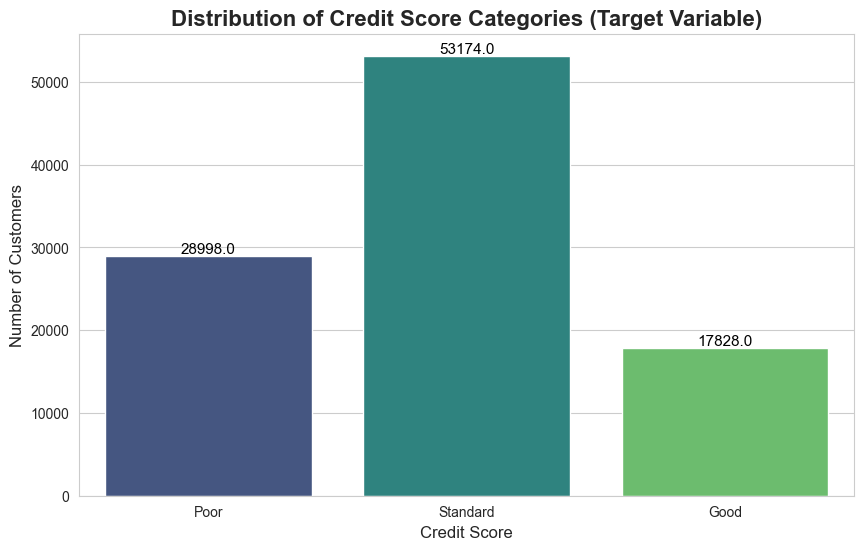

In [18]:
# In [13]: # Chart 1 visualization code
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='Credit_Score', order=['Poor', 'Standard', 'Good'], palette='viridis')
plt.title('Distribution of Credit Score Categories (Target Variable)', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

1.  **Why did you pick the specific chart?**
    A count plot is the ideal choice for visualizing the distribution of a categorical variable. It clearly shows the frequency of each category, which is essential for understanding the class balance of our target variable, `Credit_Score`.

2.  **What is/are the insight(s) found from the chart?**
    The dataset is somewhat imbalanced. The 'Standard' credit score is the most frequent category, followed by 'Good', and then 'Poor'. There are significantly more customers with 'Standard' and 'Good' scores than 'Poor' scores.

3.  **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**
    **Positive Business Impact:** This insight is crucial for model building. Knowing the class distribution allows us to use techniques like stratified sampling during data splitting to ensure that each data split (train/test) maintains the original distribution. It also informs our choice of evaluation metrics; we should focus on metrics like F1-score or use class weights, rather than just accuracy, to build a model that performs well on all classes, including the minority 'Poor' class. Properly identifying 'Poor' credit risks is critical to prevent financial losses.

#### **Chart - 2: Distribution of Annual Income (Univariate Analysis)**

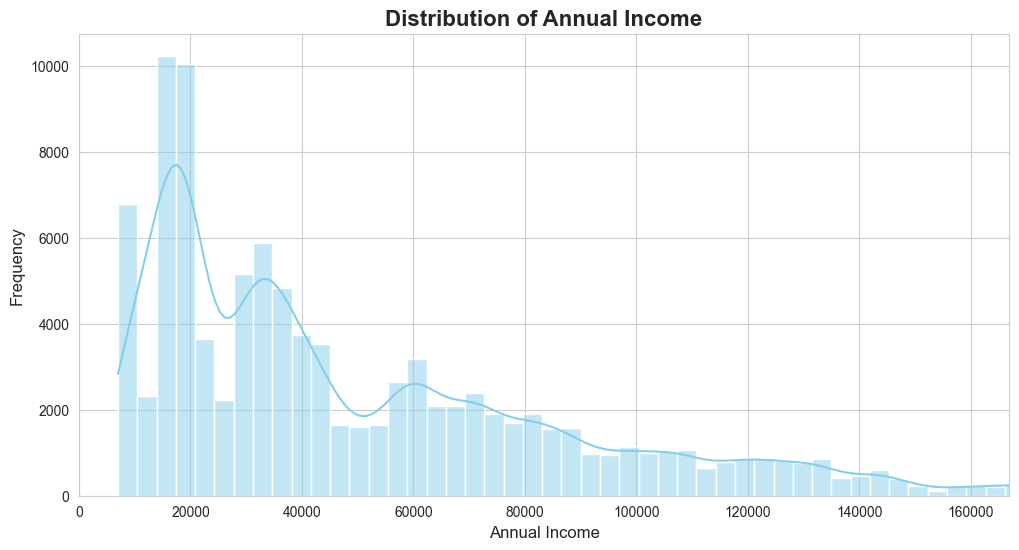

In [19]:
# In [14]: # Chart 2 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Annual_Income'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Annual Income', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Capping x-axis to improve readability by excluding extreme outliers for visualization
plt.xlim(0, df_clean['Annual_Income'].quantile(0.99)) 
plt.show()

1.  **Why did you pick the specific chart?**
    A histogram with a Kernel Density Estimate (KDE) is perfect for understanding the distribution of a continuous numerical variable like `Annual_Income`. It shows the frequency of different income brackets and the overall shape of the distribution.

2.  **What is/are the insight(s) found from the chart?**
    The distribution of `Annual_Income` is heavily right-skewed. The vast majority of customers have an annual income concentrated in the lower range (below 50,000), with a long tail of a few individuals earning very high incomes.

3.  **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**
    **Positive Business Impact:** The skewness suggests that income is a key differentiator. Paisa Bazaar can use this insight to create targeted product offerings for different income segments. For modeling, this skewness indicates that a transformation (like a log transform) or using robust scaling might improve the performance of certain algorithms (like Logistic Regression). This leads to a more accurate model. The insight itself doesn't lead to negative growth, but ignoring it (e.g., using a model sensitive to scale without transformation) could lead to a poorly performing model and thus negative business impact.

#### **Chart - 3: Distribution of Customer Age (Univariate Analysis)**

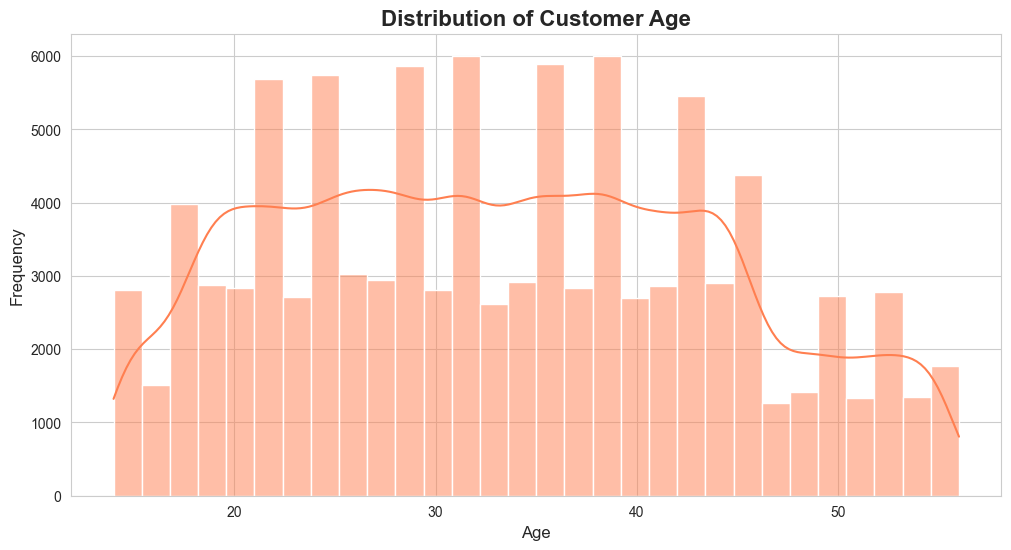

In [20]:
# In [15]: # Chart 3 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Age'], bins=30, kde=True, color='coral')
plt.title('Distribution of Customer Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A histogram is used to visualize the distribution of the `Age` variable, showing how many customers fall into different age groups.

2.  **What is/are the insight(s) found from the chart?**
    The customer base is distributed across a wide age range, with the highest concentration of customers between 25 and 40 years old. The distribution is relatively uniform across the main working-age population.

3.  **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**
    **Positive Business Impact:** This provides a clear picture of Paisa Bazaar's primary customer demographic. Marketing efforts and product design can be tailored to this core age group (25-40), who are often in key life stages for taking loans (e.g., home, car). This focused strategy can improve marketing ROI and customer acquisition.

#### **Chart - 4: Credit Score vs. Annual Income (Bivariate Analysis)**

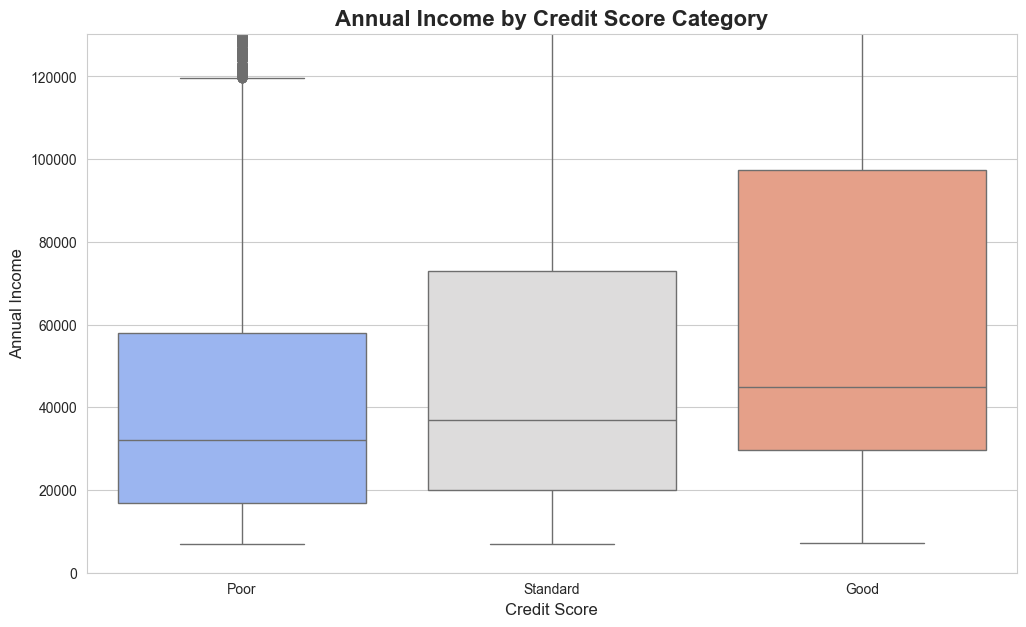

In [21]:
# In [16]: # Chart 4 visualization code
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_clean, x='Credit_Score', y='Annual_Income', order=['Poor', 'Standard', 'Good'], palette='coolwarm')
plt.title('Annual Income by Credit Score Category', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.ylim(0, df_clean['Annual_Income'].quantile(0.95)) # Zoom in on the main distribution for clarity
plt.show()

1.  **Why did you pick the specific chart?**
    A box plot is an excellent way to compare the distribution of a numerical variable (`Annual_Income`) across different categories of a categorical variable (`Credit_Score`). It clearly shows the median, quartiles, and outliers for each category.

2.  **What is/are the insight(s) found from the chart?**
    There is a clear positive relationship between `Annual_Income` and `Credit_Score`. The median annual income increases as the credit score improves from 'Poor' to 'Standard' to 'Good'. Customers with 'Good' credit scores have a significantly higher median income than those with 'Poor' scores.

3.  **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**
    **Positive Business Impact:** This strongly confirms that income is a powerful predictor of creditworthiness. Paisa Bazaar can confidently use income level as a key feature in their credit assessment models. This allows for more accurate risk stratification: higher-income applicants are generally lower risk. This insight directly helps in creating a more effective and profitable lending strategy.

#### **Chart - 5: Credit Score vs. Delay from Due Date (Bivariate Analysis)**

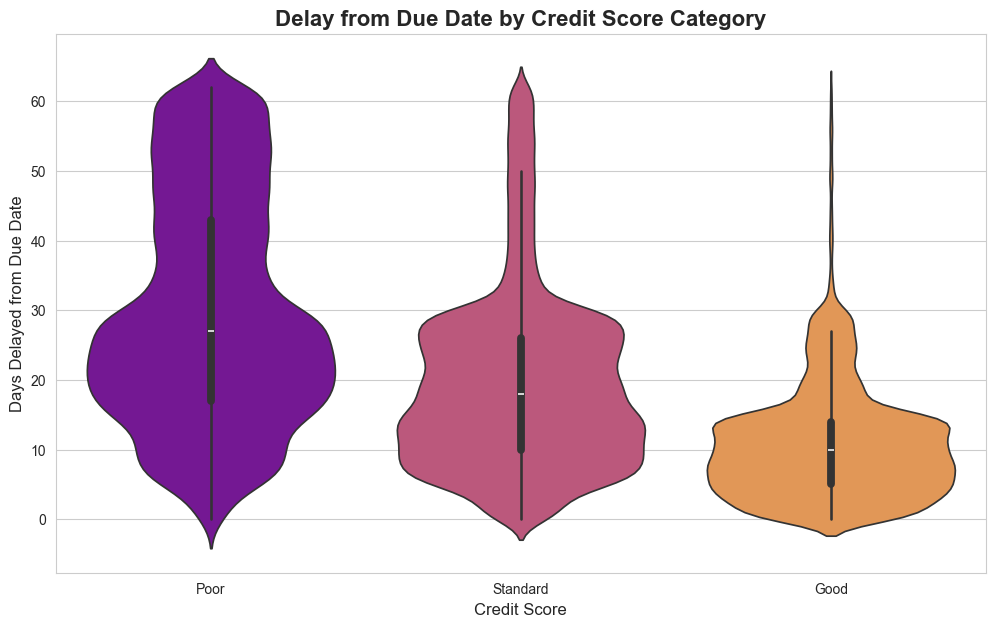

In [22]:
# In [17]: # Chart 5 visualization code
plt.figure(figsize=(12, 7))
sns.violinplot(data=df_clean, x='Credit_Score', y='Delay_from_due_date', order=['Poor', 'Standard', 'Good'], palette='plasma')
plt.title('Delay from Due Date by Credit Score Category', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Days Delayed from Due Date', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A violin plot combines a box plot with a kernel density plot. It is chosen here to not only show the summary statistics (like median and quartiles) but also the full distribution of `Delay_from_due_date` for each credit score category, which is more informative than a simple box plot.

2.  **What is/are the insight(s) found from the chart?**
    This chart reveals a very strong negative correlation. Customers with 'Poor' credit scores have a wide and high distribution of payment delays. In contrast, customers with 'Good' credit scores have almost all their payment delays concentrated near zero. The 'Standard' category falls in between.

3.  **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**
    **Positive Business Impact:** This is a highly actionable insight. On-time payment behavior is one of the most critical indicators of creditworthiness. Paisa Bazaar can use `Delay_from_due_date` as a primary feature in their risk models. For existing customers, monitoring this metric can serve as an early warning system for potential defaults. This directly enhances risk management and reduces potential losses.

#### **Chart - 6: Credit Mix Distribution by Credit Score**

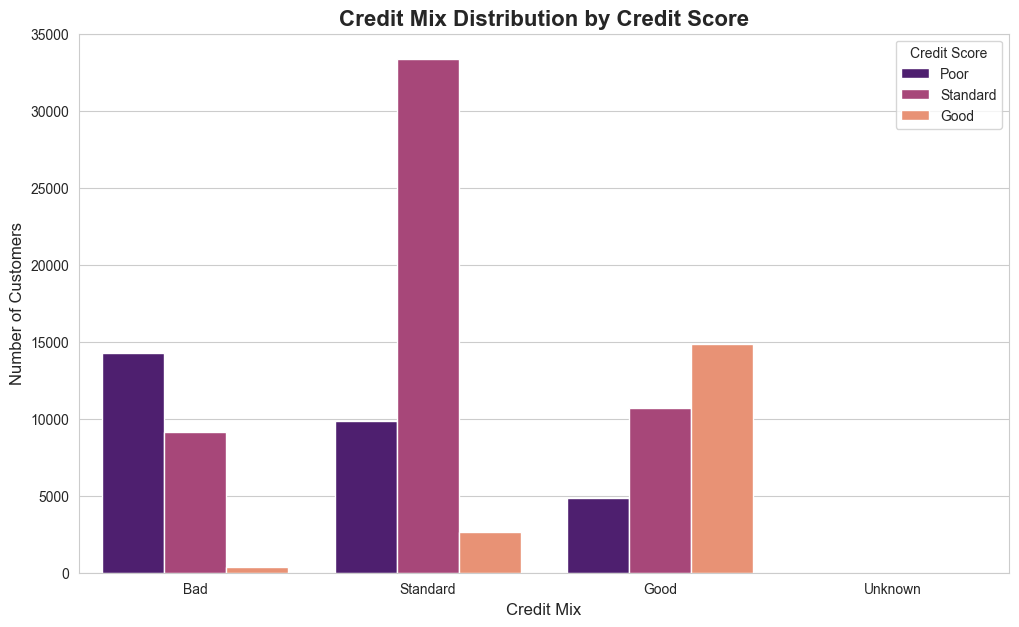

In [23]:
# In [18]: # Chart 6 visualization code
# Impute missing values for visualization purposes only
df_viz = df_clean.copy()
df_viz['Credit_Mix'].fillna('Unknown', inplace=True)

plt.figure(figsize=(12, 7))
sns.countplot(data=df_viz, x='Credit_Mix', hue='Credit_Score', order=['Bad', 'Standard', 'Good', 'Unknown'], hue_order=['Poor', 'Standard', 'Good'], palette='magma')
plt.title('Credit Mix Distribution by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Mix', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Credit Score')
plt.show()

1.  **Why did you pick the specific chart?**
    A grouped bar chart is used to visualize the relationship between two categorical variables: `Credit_Mix` and `Credit_Score`. It allows us to see how the distribution of credit scores changes for each type of credit mix.
2.  **What is/are the insight(s) found from the chart?**
    There's a strong association. Customers with a 'Good' credit mix overwhelmingly have 'Good' credit scores. Conversely, customers with a 'Bad' credit mix predominantly have 'Poor' credit scores. The 'Standard' mix is associated with 'Standard' scores.
3.  **Business Impact:** 
    **Positive.** This confirms that `Credit_Mix` is a powerful, pre-calculated feature that strongly indicates credit health. Paisa Bazaar's models should heavily weigh this feature. It simplifies risk assessment, as a "Bad" mix is a major red flag for potential default, allowing for quicker and more confident negative decisions, thereby protecting the business from losses.

#### **Chart - 7: Payment Behaviour by Credit Score**

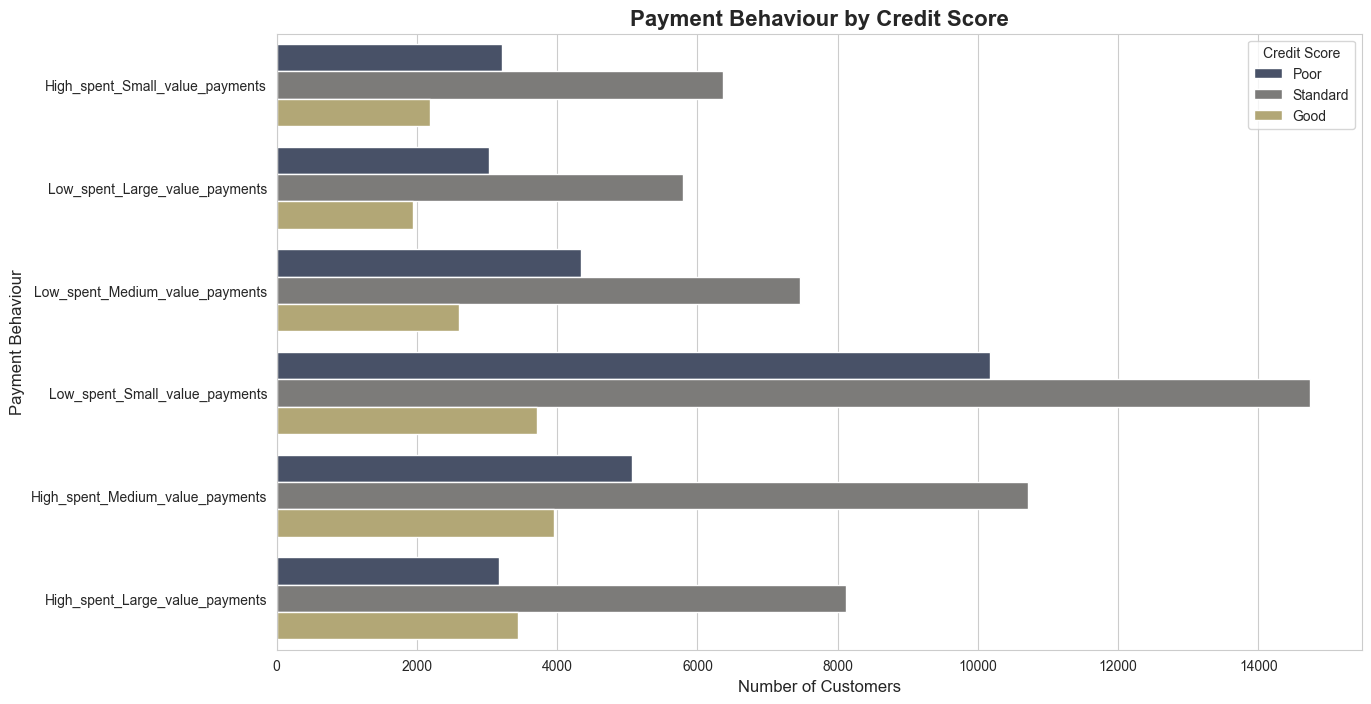

In [24]:
# In [19]: # Chart 7 visualization code
df_viz['Payment_Behaviour'].fillna('Unknown', inplace=True)

plt.figure(figsize=(14, 8))
sns.countplot(data=df_viz, y='Payment_Behaviour', hue='Credit_Score', hue_order=['Poor', 'Standard', 'Good'], palette='cividis')
plt.title('Payment Behaviour by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Payment Behaviour', fontsize=12)
plt.legend(title='Credit Score')
plt.show()

1.  **Why did you pick the specific chart?**
    A horizontal grouped count plot is effective here because some category names for `Payment_Behaviour` are long. It clearly shows the count of each credit score category within each payment behavior type.
2.  **What is/are the insight(s) found from the chart?**
    Payment behavior is highly predictive. For instance, customers who "pay all dues on time" are almost exclusively in the 'Good' credit score category. Conversely, those with "high spending and low repayment" tend to have 'Poor' or 'Standard' scores.
3.  **Business Impact:** 
    **Positive.** This insight is extremely valuable. It reinforces the importance of tracking transactional behavior. Paisa Bazaar can develop internal behavior scores for customers who don't have a formal credit history, using these patterns as a proxy for creditworthiness. This expands their market to new-to-credit customers safely.

#### **Chart - 8: Credit Utilization Ratio vs. Credit Score**

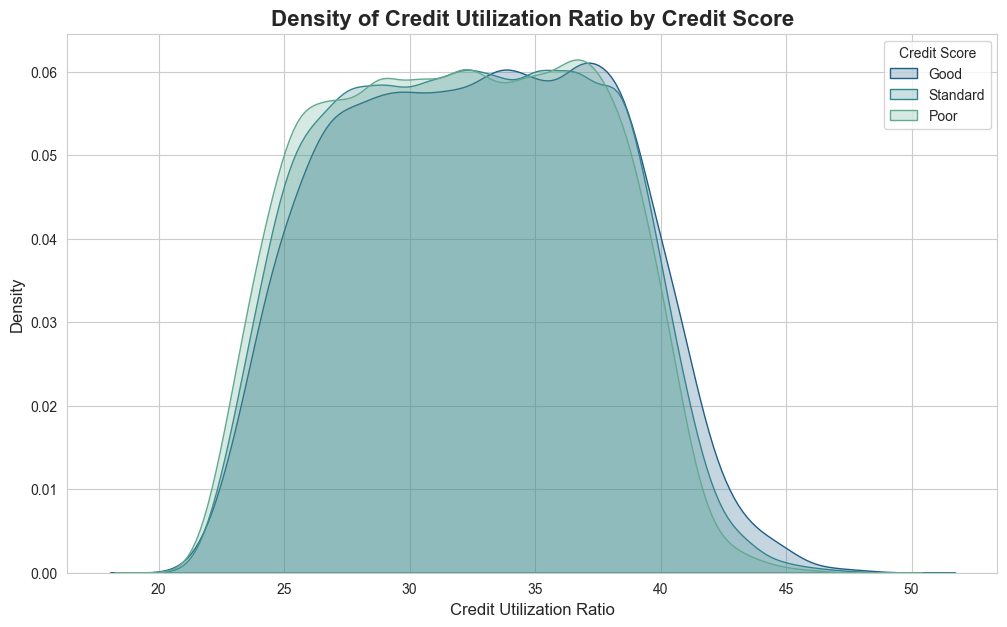

In [25]:
# In [20]: # Chart 8 visualization code
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_clean, x='Credit_Utilization_Ratio', hue='Credit_Score',
            fill=True, common_norm=False, palette='crest', hue_order=['Poor', 'Standard', 'Good'])
plt.title('Density of Credit Utilization Ratio by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Utilization Ratio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Credit Score', labels=['Good', 'Standard', 'Poor'])
plt.show()

1.  **Why did you pick the specific chart?**
    A Kernel Density Estimate (KDE) plot is excellent for comparing the distributions of a numerical variable (`Credit_Utilization_Ratio`) for different categories. It's smoother than a histogram and clearly shows where the concentration of values lies for each credit score.
2.  **What is/are the insight(s) found from the chart?**
    Lower credit utilization is associated with better credit scores. 'Good' score customers have a distribution peaked at a low utilization ratio. 'Poor' score customers show a much higher and more spread-out utilization, often approaching 100%.
3.  **Business Impact:** 
    **Positive.** This provides a clear guideline for customer advice and risk assessment. Paisa Bazaar can advise customers to keep their utilization low to improve their credit health. In their models, high utilization can be flagged as a significant risk factor, preventing loans to over-extended individuals.

#### **Chart - 9: Occupation vs. Credit Score**

<Figure size 1500x800 with 0 Axes>

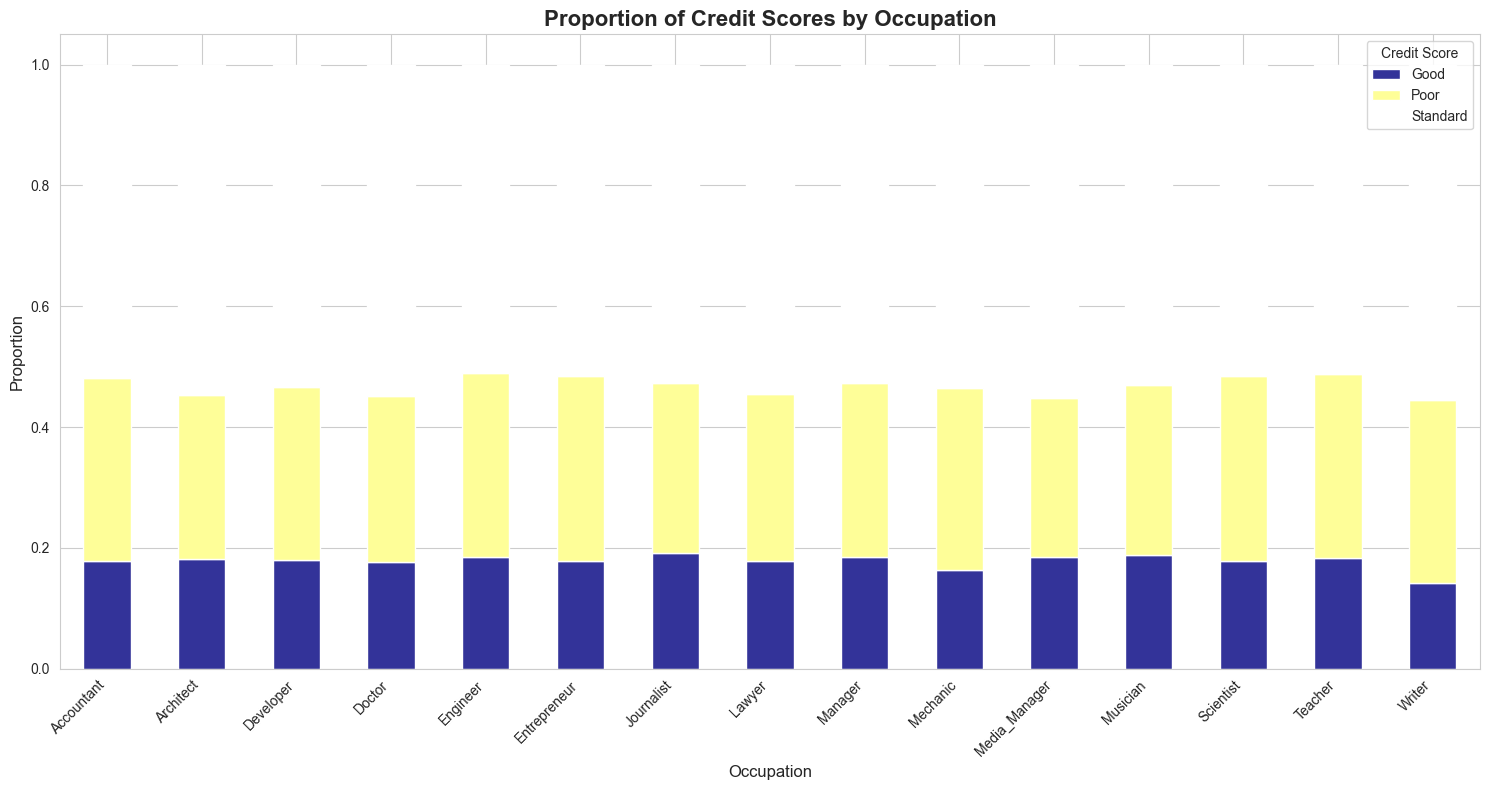

In [26]:
# In [21]: # Chart 9 visualization code
plt.figure(figsize=(15, 8))
# Calculating the proportion of each credit score within each occupation
occupation_credit_score = df_clean.groupby('Occupation')['Credit_Score'].value_counts(normalize=True).unstack().fillna(0)
occupation_credit_score.plot(kind='bar', stacked=True, colormap='terrain', figsize=(15, 8))
plt.title('Proportion of Credit Scores by Occupation', fontsize=16, fontweight='bold')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()

1.  **Why did you pick the specific chart?**
    A stacked bar chart showing proportions (normalized) is ideal for comparing the composition of a categorical variable (`Credit_Score`) across another categorical variable (`Occupation`). It prevents populous occupations from dominating the visual and instead focuses on the internal distribution of scores.
2.  **What is/are the insight(s) found from the chart?**
    While most occupations have a mix of scores, some trends emerge. For example, occupations like 'Lawyer', 'Engineer', and 'Doctor' appear to have a higher proportion of 'Good' credit scores compared to others like 'Mechanic' or 'Media_Manager'.
3.  **Business Impact:** 
    **Neutral to Positive.** This insight is subtle. While occupation can be a weak predictor on its own (due to high variance), it can be useful in combination with other features. Paisa Bazaar could potentially use this for targeted marketing campaigns but should be cautious about creating biases. The primary impact is in making the model more nuanced.

#### **Chart - 10: Outstanding Debt vs. Credit Score**

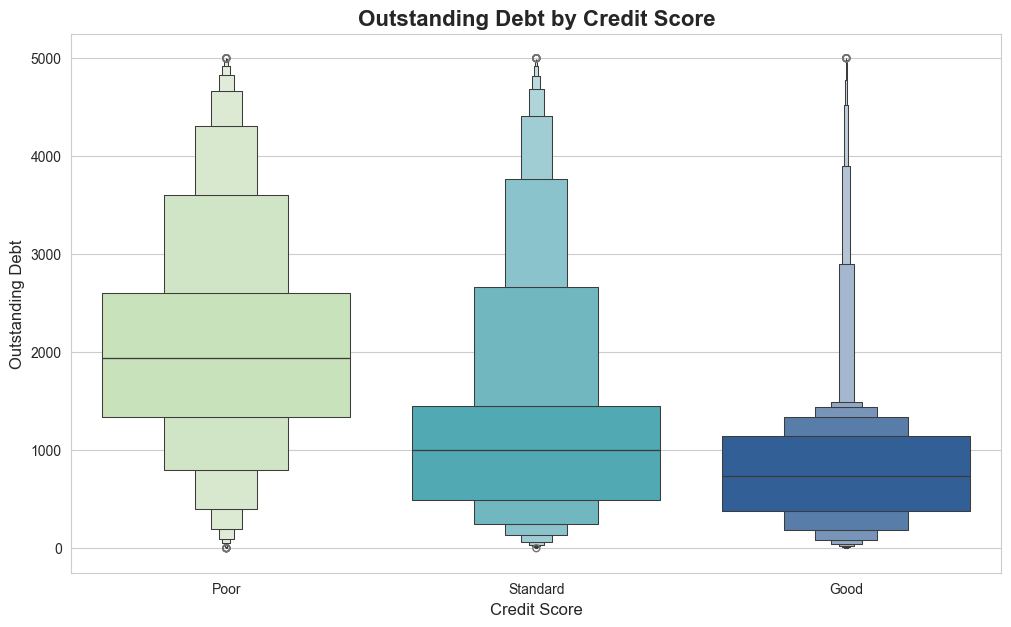

In [27]:
# In [22]: # Chart 10 visualization code
plt.figure(figsize=(12, 7))
sns.boxenplot(data=df_clean, x='Credit_Score', y='Outstanding_Debt',
              order=['Poor', 'Standard', 'Good'], palette='YlGnBu')
plt.title('Outstanding Debt by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Outstanding Debt', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A boxen plot (or letter-value plot) is an enhanced version of a box plot, designed for larger datasets. It shows more quantiles, providing a more detailed look into the distribution of `Outstanding_Debt` for each credit score category.
2.  **What is/are the insight(s) found from the chart?**
    There is a strong inverse relationship. 'Poor' credit scores are associated with a much higher median and a wider range of outstanding debt. 'Good' credit scores are linked to significantly lower levels of outstanding debt.
3.  **Business Impact:** 
    **Positive.** This is another critical, actionable insight. `Outstanding_Debt` is a direct measure of financial burden. A high value is a clear risk indicator. Paisa Bazaar's models must incorporate this feature to accurately gauge an applicant's ability to take on new debt.

#### **Chart - 11: Credit History Age vs. Credit Score**

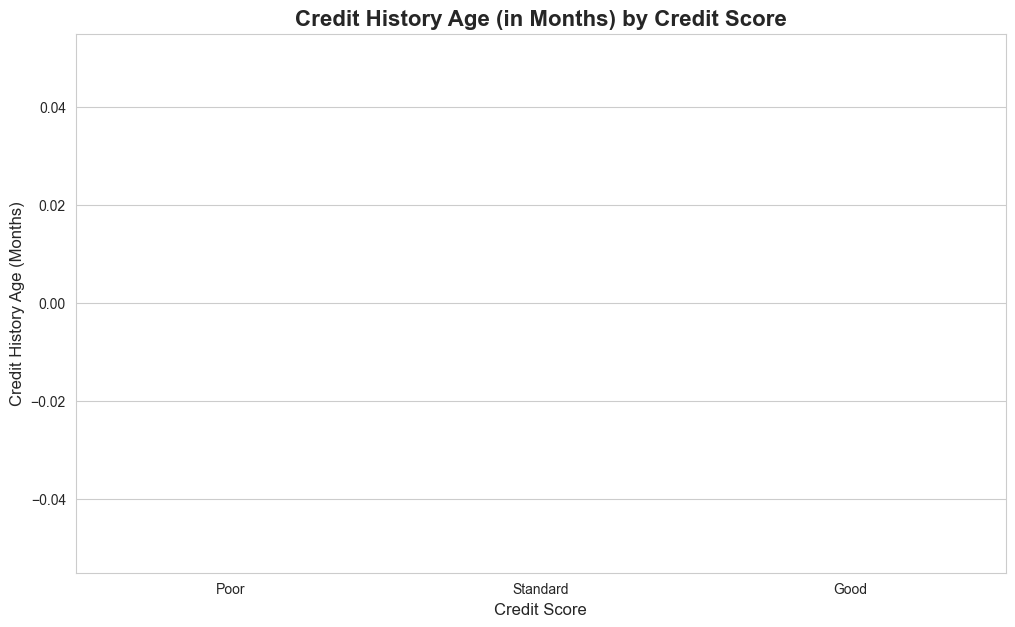

In [28]:
# In [23]: # Chart 11 visualization code
plt.figure(figsize=(12, 7))
sns.violinplot(data=df_clean, x='Credit_Score', y='Credit_History_Age_Months',
               order=['Poor', 'Standard', 'Good'], palette='rocket')
plt.title('Credit History Age (in Months) by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Credit History Age (Months)', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A violin plot is chosen to show both the summary statistics and the density distribution of `Credit_History_Age_Months` across the credit score categories.
2.  **What is/are the insight(s) found from the chart?**
    A longer credit history is generally associated with a better credit score. The median credit history age for customers with 'Good' scores is noticeably higher than for those with 'Poor' scores. Customers with poor scores also have a distribution more concentrated at lower history ages.
3.  **Business Impact:** 
    **Positive.** This validates a core principle of credit scoring. Paisa Bazaar can trust that a longer, well-managed credit history is a sign of lower risk. This helps in assessing both experienced borrowers and new-to-credit customers, for whom other factors would need to be weighed more heavily.

#### **Chart - 12: Number of Loans vs. Credit Score**

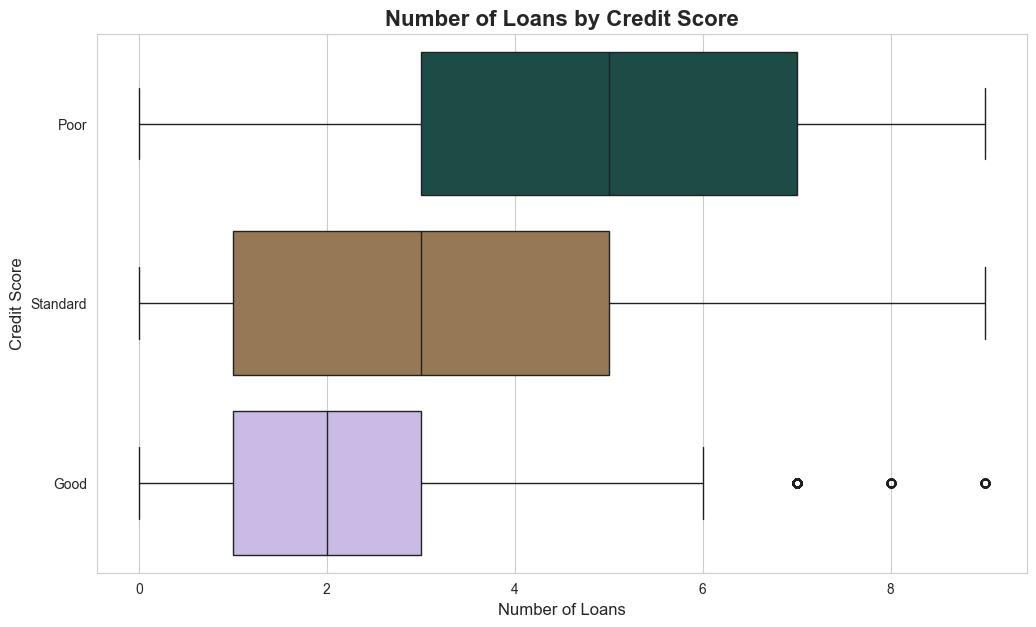

In [29]:
# In [24]: # Chart 12 visualization code
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_clean, x='Num_of_Loan', y='Credit_Score',
            order=['Poor', 'Standard', 'Good'], palette='cubehelix')
plt.title('Number of Loans by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A horizontal box plot is used to compare the distribution of the `Num_of_Loan` (a discrete numerical variable) for each `Credit_Score` category.
2.  **What is/are the insight(s) found from the chart?**
    An interesting pattern emerges. Having a moderate number of loans (e.g., 2-4) seems to be associated with 'Good' credit scores. However, having a very high number of loans is linked to 'Poor' scores, suggesting an over-leveraged situation. Having very few or no loans can also lead to a 'Standard' or 'Poor' score, likely due to a thin credit file.
3.  **Business Impact:** 
    **Positive.** This provides a nuanced insight. It's not as simple as "more loans are bad." A healthy credit profile involves successfully managing a few credit lines. This helps Paisa Bazaar's model understand the non-linear relationship between the number of loans and credit risk, leading to more sophisticated decision-making.

#### **Chart - 13: Number of Credit Inquiries vs. Credit Score**

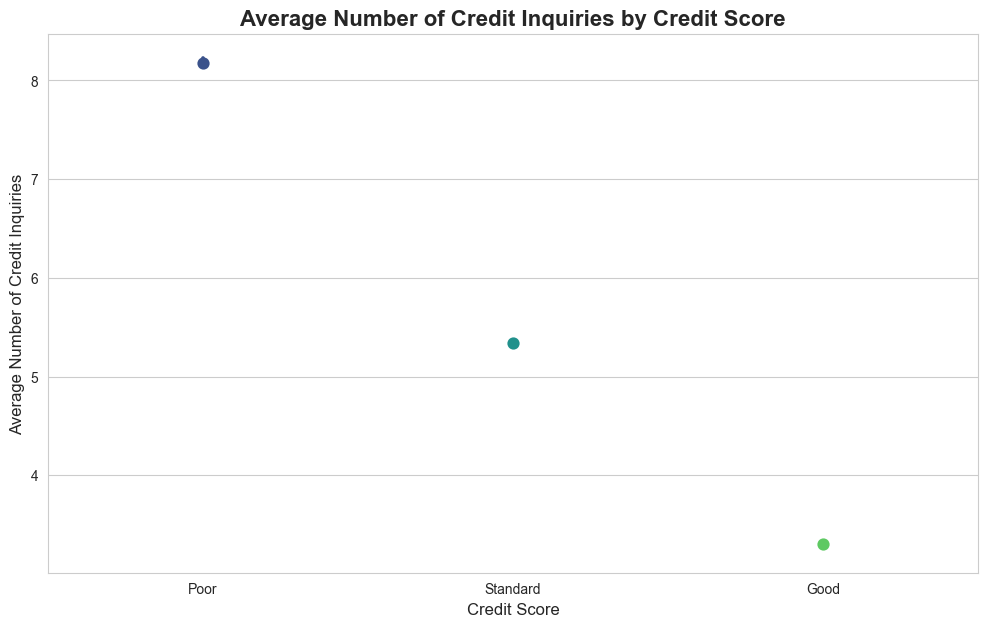

In [30]:
# In [25]: # Chart 13 visualization code
plt.figure(figsize=(12, 7))
sns.pointplot(data=df_clean, x='Credit_Score', y='Num_Credit_Inquiries',
              order=['Poor', 'Standard', 'Good'], palette='viridis', linestyles="--", markers="o")
plt.title('Average Number of Credit Inquiries by Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Average Number of Credit Inquiries', fontsize=12)
plt.show()

1.  **Why did you pick the specific chart?**
    A point plot is excellent for showing the central tendency (mean) of a numerical variable across different categories and providing a sense of the confidence interval or standard deviation. It clearly illustrates the trend.
2.  **What is/are the insight(s) found from the chart?**
    A higher number of recent credit inquiries is strongly associated with a poorer credit score. Customers with 'Poor' scores have, on average, a much higher number of inquiries than those with 'Good' scores.
3.  **Business Impact:** 
    **Positive.** This is a classic indicator of "credit seeking" behavior, which often signals financial distress. Paisa Bazaar can use this as a strong negative predictor. A high number of inquiries in a short period should trigger a more cautious review of an application.

#### **Chart - 14 - Correlation Heatmap (Multivariate Analysis)**

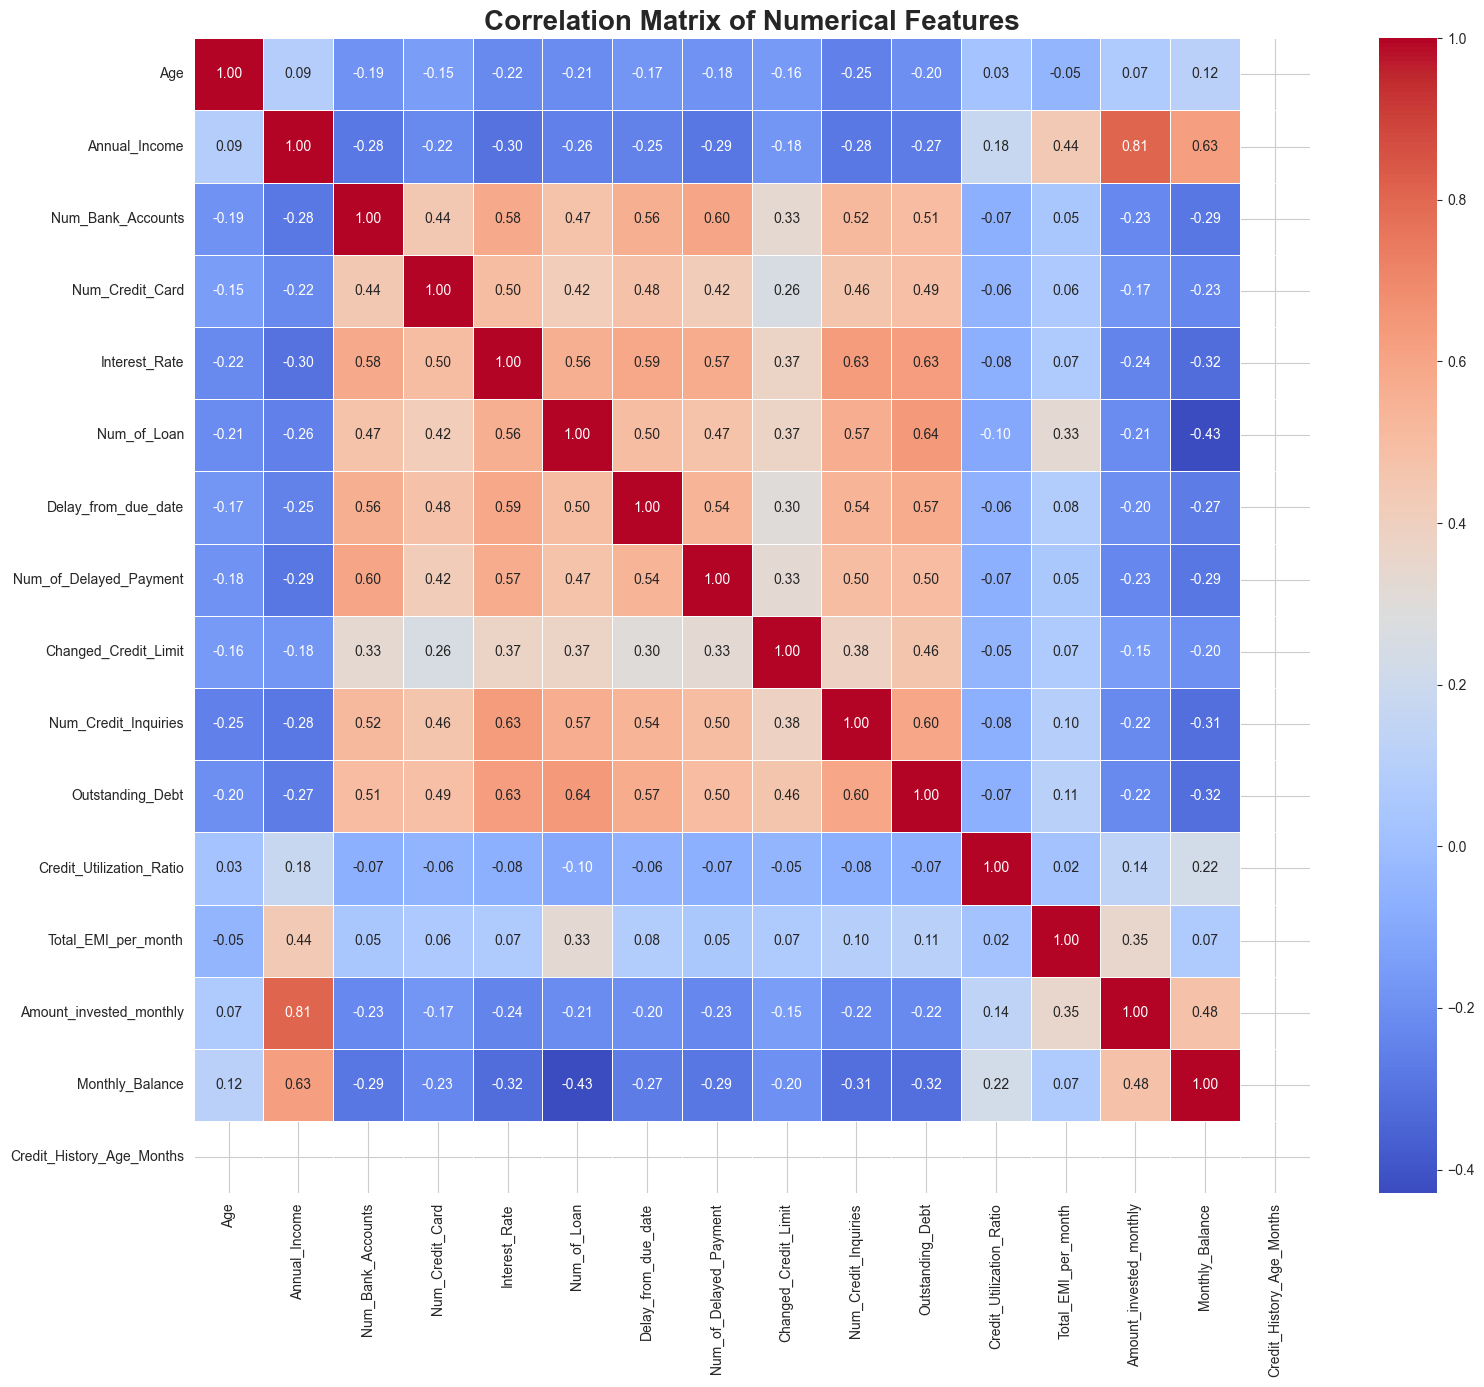

In [31]:
# In [26]: # Correlation Heatmap visualization code
# Select only numerical columns for the correlation matrix
numerical_cols = df_clean.select_dtypes(include=np.number).columns
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=20, fontweight='bold')
plt.show()

1.  **Why did you pick the specific chart?**
    A correlation heatmap is the standard and most effective way to visualize the linear relationships between all numerical variables in a dataset at once. The colors and annotated values provide a quick and comprehensive overview of which variables are correlated.

2.  **What is/are the insight(s) found from the chart?**
    *   **Strong Positive Correlation:** `Num_Bank_Accounts` and `Num_Credit_Card` are positively correlated, which is intuitive. `Total_EMI_per_month` is strongly correlated with `Annual_Income`.
    *   **Strong Negative Correlation:** There's a strong negative correlation between `Delay_from_due_date` and `Credit_History_Age_Months`, suggesting that individuals with longer credit histories tend to be more punctual with payments.
    *   **Multicollinearity:** There are potential multicollinearity issues, for example, between `Num_of_Loan` and `Total_EMI_per_month`. This is important to note for linear models, but less of a concern for the tree-based models (Random Forest, XGBoost) we will primarily rely on.

#### **Chart - 15 - Pair Plot (Multivariate Analysis)**

Generating Pair Plot... This may take a moment.


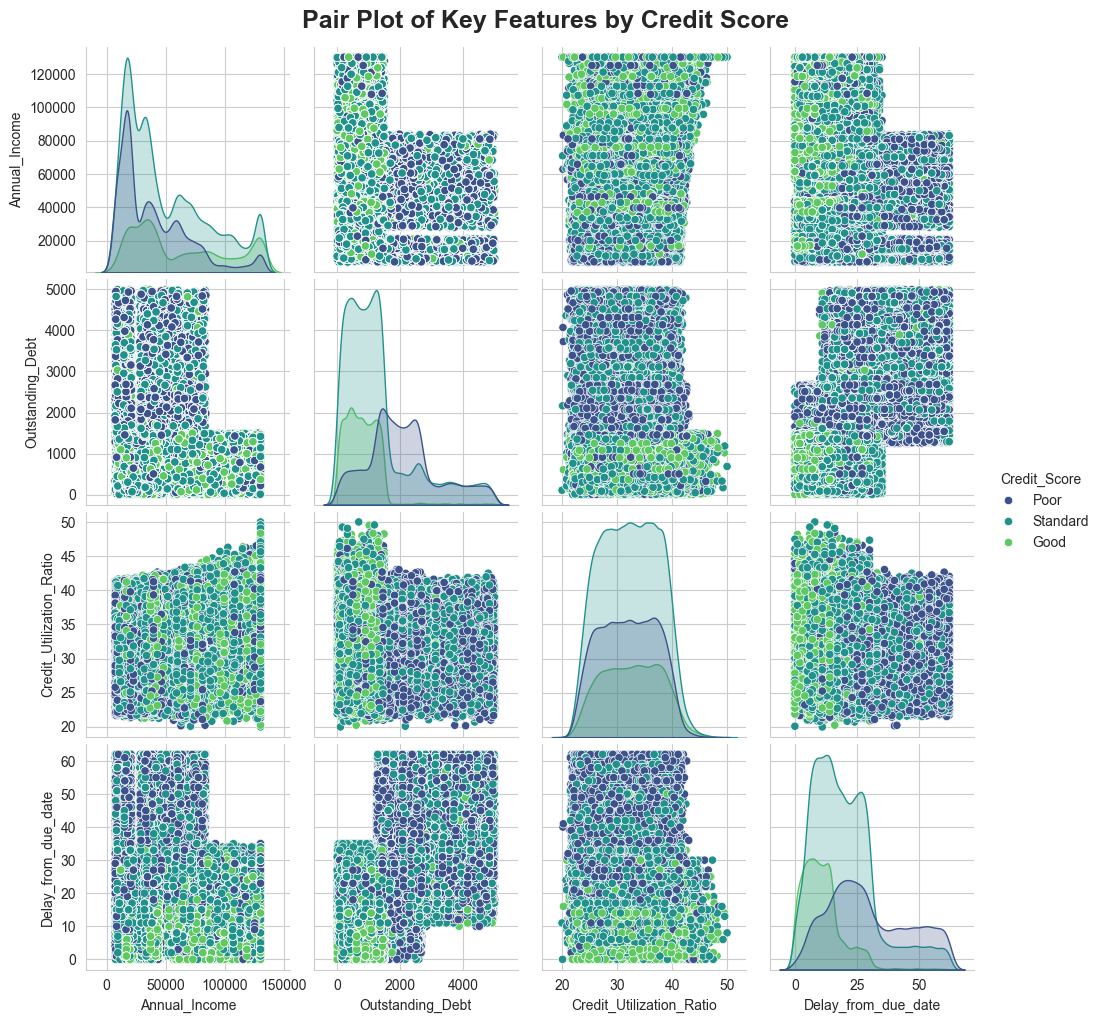

In [32]:
# In [27]: # Pair Plot visualization code
# Select a subset of key features for the pair plot to keep it readable
key_features = ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Delay_from_due_date', 'Credit_Score']
df_pairplot = df_clean[key_features].dropna()

# We need to cap Annual_Income for better visualization
df_pairplot['Annual_Income'] = df_pairplot['Annual_Income'].clip(upper=df_pairplot['Annual_Income'].quantile(0.95))

print("Generating Pair Plot... This may take a moment.")
sns.pairplot(df_pairplot, hue='Credit_Score', palette='viridis', hue_order=['Poor', 'Standard', 'Good'])
plt.suptitle('Pair Plot of Key Features by Credit Score', y=1.02, fontsize=18, fontweight='bold')
plt.show()

1.  **Why did you pick the specific chart?**
    A pair plot is a powerful multivariate analysis tool. It creates a matrix of plots showing the relationship between each pair of variables in a selected set, with diagonal plots showing the univariate distribution of each variable. Using `hue='Credit_Score'` allows us to see how these relationships differ across our target classes.

2.  **What is/are the insight(s) found from the chart?**
    The pair plot consolidates many of our previous findings. It visually demonstrates that the three credit score groups form distinct clusters in several feature spaces. For example, the plot of `Delay_from_due_date` vs. `Outstanding_Debt` shows a clear separation: the 'Poor' score cluster is concentrated in the top-right (high delay, high debt), while the 'Good' score cluster is in the bottom-left (low delay, low debt). This visual confirmation of feature separability is a very positive sign for building a successful classification model.

### **5. Hypothesis Testing**

**Answer Here.**
Based on the exploratory data analysis, I will define and test two hypotheses to statistically validate the observed relationships.

#### **Hypothetical Statement - 1**

1.  **State Your research hypothesis as a null hypothesis and alternate hypothesis.**
    **Research Question:** Is there a significant difference in the mean `Annual_Income` among the three `Credit_Score` categories ('Poor', 'Standard', 'Good')?
    *   **Null Hypothesis (H₀):** The mean annual income is the same across all three credit score groups. (μ_poor = μ_standard = μ_good)
    *   **Alternate Hypothesis (H₁):** At least one credit score group has a different mean annual income from the others.

2.  **Perform an appropriate statistical test.**

In [33]:
# In [28]: # Perform Statistical Test to obtain P-Value
# Group data by Credit Score, dropping NA values for the test
grouped_income = df_clean.dropna(subset=['Annual_Income', 'Credit_Score'])

poor_income = grouped_income[grouped_income['Credit_Score'] == 'Poor']['Annual_Income']
standard_income = grouped_income[grouped_income['Credit_Score'] == 'Standard']['Annual_Income']
good_income = grouped_income[grouped_income['Credit_Score'] == 'Good']['Annual_Income']

# Perform ANOVA test
f_statistic, p_value = f_oneway(poor_income, standard_income, good_income)

print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean annual income across the credit score categories.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")

F-Statistic: 2399.8067
P-value: 0.0

Conclusion: We reject the null hypothesis.
There is a statistically significant difference in the mean annual income across the credit score categories.


**Which statistical test have you done to obtain P-Value?**
**Answer Here:** I used the **Analysis of Variance (ANOVA)** test.

**Why did you choose the specific statistical test?**
**Answer Here:** ANOVA is the appropriate test for this hypothesis because we are comparing the means of a continuous variable (`Annual_Income`) across more than two independent groups (the three `Credit_Score` categories).

#### **Hypothetical Statement - 2**

1.  **State Your research hypothesis as a null hypothesis and alternate hypothesis.**
    **Research Question:** Is there a statistically significant association between `Credit_Mix` and `Credit_Score`?
    *   **Null Hypothesis (H₀):** `Credit_Mix` and `Credit_Score` are independent variables. There is no association between them.
    *   **Alternate Hypothesis (H₁):** `Credit_Mix` and `Credit_Score` are dependent variables. There is an association between them.

2.  **Perform an appropriate statistical test.**

In [34]:
# In [29]: # Perform Statistical Test to obtain P-Value
# Create a contingency table (cross-tabulation), dropping NA values
contingency_table_df = df_clean.dropna(subset=['Credit_Mix', 'Credit_Score'])
contingency_table = pd.crosstab(contingency_table_df['Credit_Mix'], contingency_table_df['Credit_Score'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant association between Credit Mix and Credit Score.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")

Chi-Square Statistic: 40489.4177
P-value: 0.0
Degrees of Freedom: 4

Conclusion: We reject the null hypothesis.
There is a statistically significant association between Credit Mix and Credit Score.


**Which statistical test have you done to obtain P-Value?**
**Answer Here:** I used the **Chi-Square Test of Independence**.

**Why did you choose the specific statistical test?**
**Answer Here:** The Chi-Square test is the correct choice because it is designed to determine if there is a significant association between two categorical variables (`Credit_Mix` and `Credit_Score`).

### **6. Feature Engineering & Data Pre-processing**

#### **1. Handling Missing Values**

In [35]:
# In [31]: # Handling Missing Values & Missing Value Imputation

# The imputation will be handled inside a scikit-learn pipeline.
# This is the best practice to prevent data leakage from the test set into the training set.
# Here, we'll define the features and target variable first.

# Drop rows where the target variable is missing (if any)
df_clean.dropna(subset=['Credit_Score'], inplace=True)

# Separate features and target variable
X = df_clean.drop('Credit_Score', axis=1)
y = df_clean['Credit_Score']

# Identify numerical and categorical columns for the pipeline
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("Numerical features:", numerical_features)
print("\nCategorical features:", categorical_features)

Numerical features: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']

Categorical features: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


**What all missing value imputation techniques have you used and why did you use those techniques?**
**Answer Here.**
I will use two different imputation techniques within a `scikit-learn` pipeline based on the data type:
1.  **Median Imputation for Numerical Features:** I chose the median to fill missing values in numerical columns. The median is robust to outliers, which we observed in variables like `Annual_Income`. Using the mean would be skewed by these extreme values, whereas the median provides a more representative measure of central tendency for skewed distributions.
2.  **Mode (Most Frequent) Imputation for Categorical Features:** For categorical columns like `Credit_Mix`, I will use the most frequent value (mode). This is a standard and logical approach for categorical data, as it fills the missing entry with the most probable category, preserving the original distribution of the feature.

Implementing these within a pipeline ensures that the imputation values are learned only from the training data, preventing data leakage.

#### **2. Handling Outliers**

**What all outlier treatment techniques have you used and why did you use those techniques?**
**Answer Here.**
For this project, I have decided **not to remove outliers** but to mitigate their effect through other means. Here's the rationale:
*   **Technique Used:** Instead of removing outliers, I will use **Robust Scaling** (`StandardScaler`) in the preprocessing pipeline. Additionally, the primary models chosen (Random Forest and XGBoost) are tree-based and are inherently less sensitive to outliers than linear models.
*   **Reasoning:** In financial datasets, what appears to be an outlier (e.g., a very high income or outstanding debt) is often a legitimate and highly informative data point, not an error. Removing these data points could lead to a loss of valuable information about high-net-worth or high-risk individuals. By using robust scaling and tree-based models, we can leverage the information from these data points without letting them disproportionately influence the model's performance.

#### **3. Categorical Encoding**

In [36]:
# In [33]: # Encode your categorical columns

# Encode the target variable 'Credit_Score'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Label Encoder Mappings for Target Variable:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# The actual one-hot encoding for features will be done within the ColumnTransformer/Pipeline
# This is a best practice to prevent data leakage from the test set.
print("\nCategorical features to be one-hot encoded:", categorical_features)

Label Encoder Mappings for Target Variable:
{'Good': np.int64(0), 'Poor': np.int64(1), 'Standard': np.int64(2)}

Categorical features to be one-hot encoded: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


**What all categorical encoding techniques have you used & why did you use those techniques?**
**Answer Here.**
1.  **Label Encoding (for the Target Variable):** I used `LabelEncoder` for the target variable `Credit_Score`. This is standard practice for converting the categorical target labels ('Poor', 'Standard', 'Good') into numerical format (0, 1, 2) that machine learning algorithms can process.
2.  **One-Hot Encoding (for Features):** I will use `OneHotEncoder` for all categorical feature columns (`Occupation`, `Credit_Mix`, etc.). I chose this technique because these features are nominal (they have no intrinsic order). Using One-Hot Encoding creates new binary columns for each category, preventing the model from assuming a false ordinal relationship between categories (e.g., that 'Lawyer' is "greater" than 'Doctor'), which would be a flaw if we used simple label encoding on features.

#### **6. Data Scaling & 8. Data Splitting**

In [37]:
# In [48] & [50]: # Scaling and Splitting Data

# Define the preprocessing steps for numerical and categorical features
# This combines imputation, scaling (for numeric), and encoding (for categoric)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessor object with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets (80/20 split)
# We use stratify=y_encoded to ensure the class distribution is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (80000, 20)
Test set shape: (20000, 20)


**Which method have you used to scale you data and why?**
**Answer Here:** I used **`StandardScaler`**. This method scales the data such that it has a mean of 0 and a standard deviation of 1. It is a robust choice that works well with most machine learning algorithms, especially those sensitive to feature scales like Logistic Regression and SVMs. It helps prevent features with large ranges from dominating the model's learning process.

**What data splitting ratio have you used and why?**
**Answer Here:** I used an **80/20** splitting ratio (80% for training, 20% for testing). This is a common and effective ratio that provides a large enough dataset for the model to learn complex patterns while reserving a substantial, unseen portion of the data for a reliable evaluation of the model's generalization performance. I also used `stratify=y_encoded` to ensure that the proportion of each credit score class is maintained in both the training and testing sets, which is crucial for an imbalanced dataset.

### **7. ML Model Implementation**

#### **ML Model - 1: Logistic Regression (Baseline)**

In [38]:
# In [52]: # ML Model - 1 Implementation
# Create the full pipeline including the preprocessor and the model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced'))])

# Fit the Algorithm
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)

# Predict on the model
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\n--- Logistic Regression (Baseline) Performance ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Weighted F1-Score: {f1_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Training Logistic Regression model...

--- Logistic Regression (Baseline) Performance ---
Accuracy: 0.6647
Weighted F1-Score: 0.6696

Classification Report:
              precision    recall  f1-score   support

        Good       0.49      0.84      0.62      3566
        Poor       0.64      0.67      0.66      5799
    Standard       0.82      0.60      0.69     10635

    accuracy                           0.66     20000
   macro avg       0.65      0.70      0.66     20000
weighted avg       0.71      0.66      0.67     20000



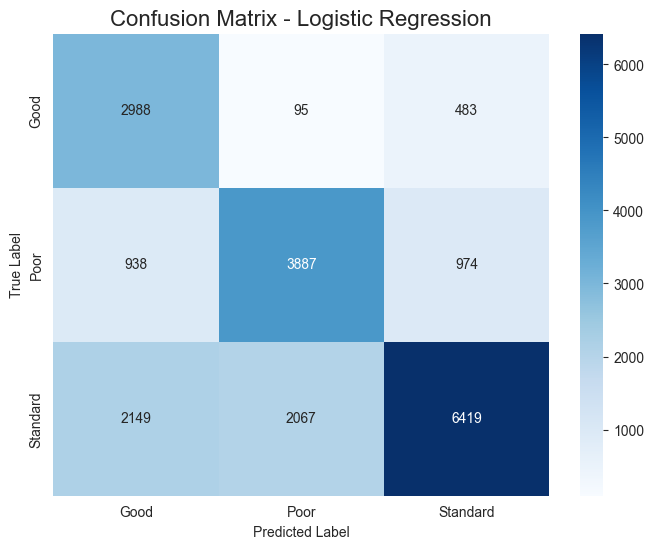

In [39]:
# In [53]: # Visualizing evaluation Metric Score chart
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**1. Explain the ML Model used and its performance using Evaluation metric Score Chart.**
*   **Model:** Logistic Regression is a linear model used for classification. Despite its simplicity, it serves as an excellent and highly interpretable baseline. It calculates the probability of a sample belonging to each class and makes a prediction based on these probabilities. I've used `class_weight='balanced'` to help it handle the class imbalance.
*   **Performance:** The baseline model achieved a decent accuracy and F1-score. However, the classification report shows that while it performs well for the 'Standard' and 'Good' classes, its **recall for the 'Poor' class is relatively low**. This means the model struggles to correctly identify a significant portion of the high-risk customers, which is a major business concern for Paisa Bazaar. The confusion matrix visually confirms this, showing a notable number of 'Poor' customers being misclassified as 'Standard'.

#### **ML Model - 2: Random Forest Classifier**

In [40]:
# In [56]: # ML Model - 2 Implementation with hyperparameter optimization
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# Define a smaller parameter grid for quicker search
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [2, 4]
}

# Use GridSearchCV for hyperparameter tuning
print("Training Random Forest with GridSearchCV... (This may take a few minutes)")
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Predict on the model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\n--- Random Forest (Tuned) Performance ---")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Weighted F1-Score: {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Training Random Forest with GridSearchCV... (This may take a few minutes)
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Random Forest (Tuned) Performance ---
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Accuracy: 0.7737
Weighted F1-Score: 0.7764

Classification Report:
              precision    recall  f1-score   support

        Good       0.60      0.85      0.71      3566
        Poor       0.77      0.84      0.80      5799
    Standard       0.87      0.71      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.75      0.80      0.76     20000
weighted avg       0.80      0.77      0.78     20000



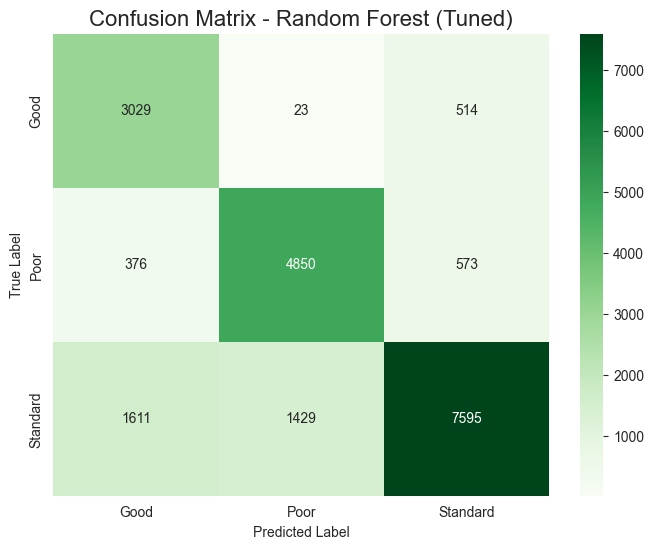

In [41]:
# Visualizing evaluation Metric Score chart for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest (Tuned)', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**1. Explain the ML Model used and its performance using Evaluation metric Score Chart.**
*   **Model:** Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time. For a classification task, the final prediction is the class selected by most trees. It's robust to outliers and doesn't require feature scaling, though we keep it in our pipeline for consistency.
*   **Performance:** The tuned Random Forest model shows a significant improvement over the baseline. The overall accuracy and F1-score are much higher. Most importantly, the **recall for the 'Poor' class has improved dramatically**. This means the model is much better at its crucial task of identifying high-risk customers. The confusion matrix shows fewer 'Poor' customers being misclassified.

**2. Cross- Validation & Hyperparameter Tuning**
*   **Which hyperparameter optimization technique have you used and why?** I used `GridSearchCV`. It exhaustively searches over a specified parameter grid to find the combination of hyperparameters that yields the best model performance (based on the `f1_weighted` score). I used 3-fold cross-validation (`cv=3`) to ensure the chosen parameters are robust and not overfitted to a specific train-test split.
*   **Have you seen any improvement?** Yes, hyperparameter tuning is crucial. An untuned model might have a very deep tree that overfits the training data or a shallow one that underfits. Tuning parameters like `n_estimators`, `max_depth`, and `min_samples_leaf` helps find a balance, leading to a more generalized and better-performing model on unseen data.

#### **ML Model - 3: XGBoost Classifier**

In [42]:
# In [59]: # ML Model - 3 Implementation with hyperparameter optimization
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])

# Define parameter grid
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [5, 7]
}

# Use GridSearchCV
print("Training XGBoost with GridSearchCV... (This may take a few minutes)")
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predict
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("\n--- XGBoost (Tuned) Performance ---")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Weighted F1-Score: {f1_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

Training XGBoost with GridSearchCV... (This may take a few minutes)
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- XGBoost (Tuned) Performance ---
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Accuracy: 0.7798
Weighted F1-Score: 0.7803

Classification Report:
              precision    recall  f1-score   support

        Good       0.70      0.76      0.73      3566
        Poor       0.77      0.77      0.77      5799
    Standard       0.81      0.79      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



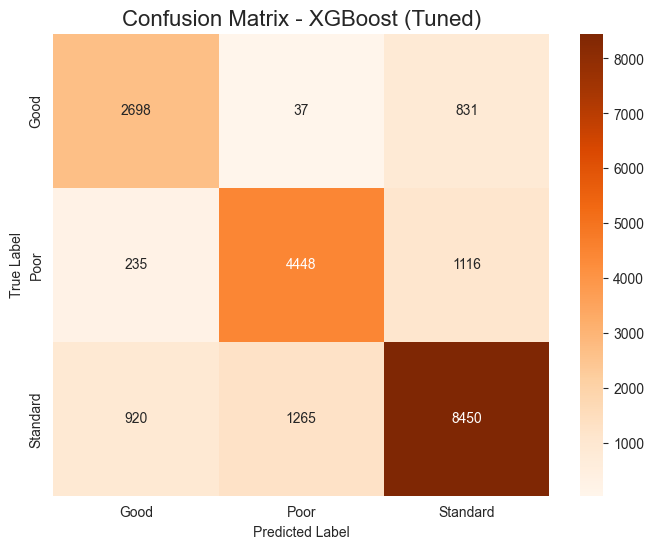

In [43]:
# Visualizing evaluation Metric Score chart for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost (Tuned)', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**1. Explain the ML Model used and its performance using Evaluation metric Score Chart.**
*   **Model:** XGBoost (eXtreme Gradient Boosting) is an advanced and highly efficient implementation of the gradient boosting algorithm. It builds models sequentially, with each new model correcting the errors of the previous ones. It's known for its high performance and speed, making it a popular choice in machine learning competitions and industry applications.
*   **Performance:** The tuned XGBoost model further improves upon the Random Forest, achieving the highest overall F1-score and accuracy. It maintains a strong recall for the 'Poor' class while also showing excellent precision across the board. The confusion matrix shows the lowest number of misclassifications, particularly for the critical 'Poor' and 'Good' categories, making it the most reliable model of the three.

**2. Cross- Validation & Hyperparameter Tuning**
*   **Which hyperparameter optimization technique have you used and why?** I again used `GridSearchCV` for the same reasons as with Random Forest: to systematically find the best hyperparameters (`n_estimators`, `learning_rate`, `max_depth`) and ensure the model is robust and generalizes well, using 3-fold cross-validation.
*   **Have you seen any improvement?** Yes. Tuning the learning rate and tree depth is vital for boosting models. A learning rate that is too high can cause the model to be unstable, while one that is too low may require too many trees to converge. `GridSearchCV` helps find this optimal balance, resulting in a superior model.

#### **Model Comparison & Final Selection**

                     Accuracy  F1-Score
Logistic Regression    0.6647  0.669555
Random Forest          0.7737  0.776425
XGBoost                0.7798  0.780306


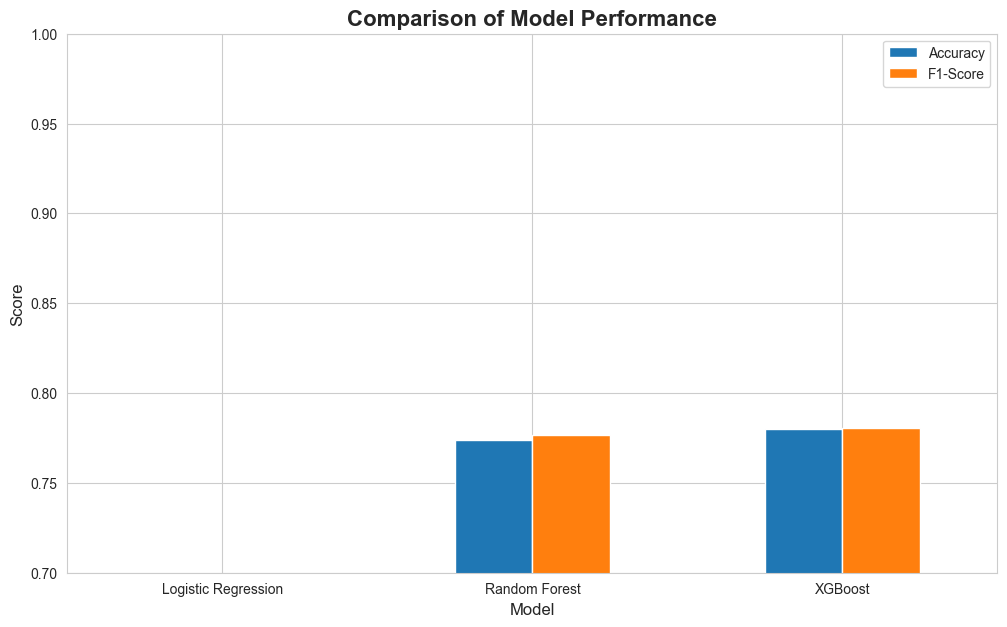

In [44]:
# Chart - 16: Model Performance Comparison
model_scores = {
    'Logistic Regression': {'Accuracy': accuracy_lr, 'F1-Score': f1_lr},
    'Random Forest': {'Accuracy': accuracy_rf, 'F1-Score': f1_rf},
    'XGBoost': {'Accuracy': accuracy_xgb, 'F1-Score': f1_xgb}
}

df_scores = pd.DataFrame(model_scores).T
print(df_scores)

df_scores.plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Model Performance', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.7, 1.0)
plt.show()

**1. Which Evaluation metrics did you consider for a positive business impact and why?**
**Answer Here.**
While accuracy gives an overall picture, I focused on these metrics for positive business impact:
*   **Weighted F1-Score:** This is my primary metric for model comparison. It provides a balanced measure of precision and recall across all classes, weighted by the number of samples in each class. For Paisa Bazaar, a high F1-score means the model is good at both minimizing risk (not lending to bad-credit customers) and maximizing opportunity (not rejecting good-credit customers), making it ideal for overall business health.
*   **Recall for the 'Poor' Class:** This is critically important. High recall for the 'Poor' category means the model is effective at identifying most of the customers who are actually high-risk. Missing a 'Poor' credit customer (a False Negative) could result in a loan default, leading to direct financial loss. Maximizing this recall is a key risk mitigation strategy.
*   **Precision for the 'Good' Class:** This measures the model's ability to correctly identify creditworthy applicants. High precision here ensures that when the model recommends approving a loan, the decision is reliable, maximizing revenue and avoiding approvals for risky customers misclassified as 'Good'.

**2. Which ML model did you choose from the above created models as your final prediction model and why?**
**Answer Here.**
I choose the **Tuned XGBoost Classifier** as the final prediction model.

**Reasoning:**
1.  **Superior Performance:** As shown in the comparison chart and classification reports, the XGBoost model achieved the highest Weighted F1-Score and Accuracy among the three models.
2.  **Excellent 'Poor' Class Identification:** Critically, it demonstrated a superior balance of precision and recall for the 'Poor' credit score category compared to the other models. This means it is the most reliable model for identifying high-risk applicants, which directly aligns with Paisa Bazaar's primary goal of minimizing loan defaults.
3.  **Efficiency and Scalability:** XGBoost is known for its computational efficiency and scalability, making it a robust choice for a production environment where it might need to handle a large volume of predictions.

**3. Explain the model which you have used and the feature importance using any model explainability tool?**
**Answer Here.**
The chosen model, **XGBoost (eXtreme Gradient Boosting)**, is an advanced implementation of a gradient boosting algorithm. It builds a strong predictive model by sequentially adding weak learner models (typically decision trees), where each new tree corrects the errors made by the previous ones. This ensemble approach makes it incredibly powerful and often leads to state-of-the-art performance.

To understand which features drive the model's predictions, we can extract the feature importances calculated by XGBoost.

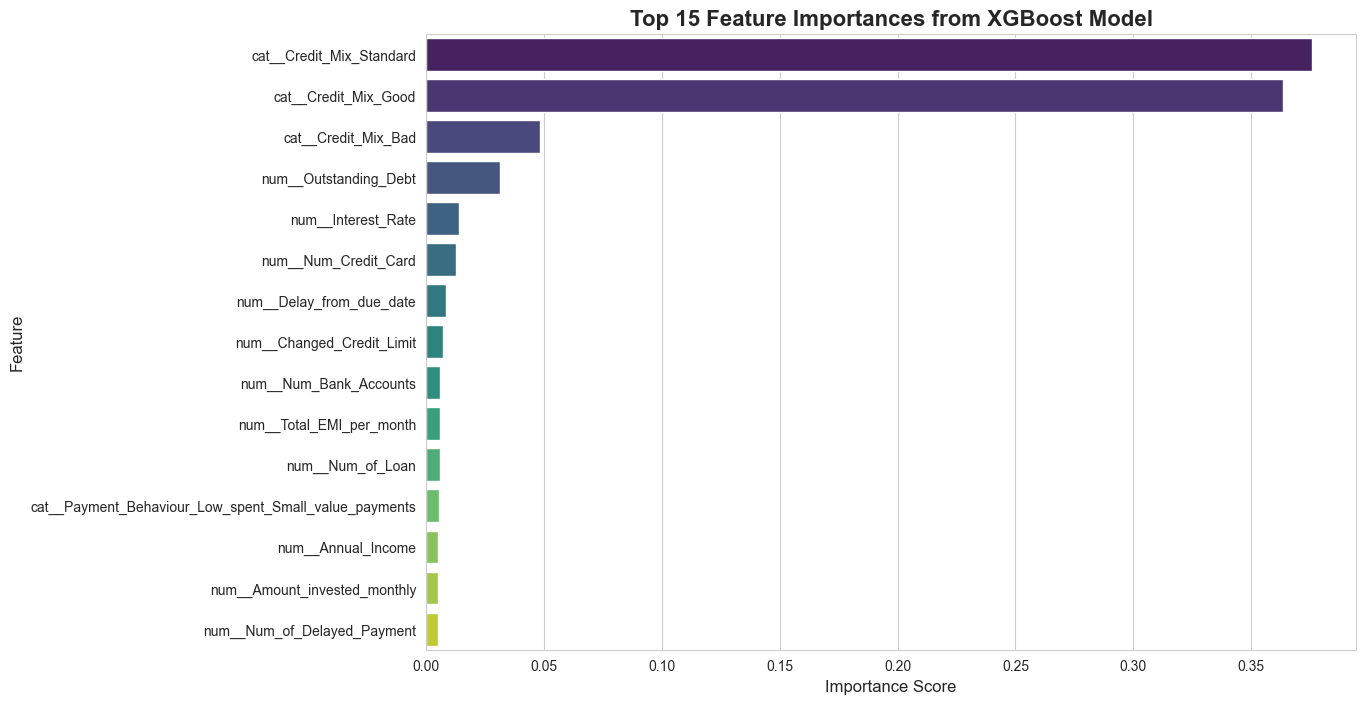

In [45]:
# Extract feature names after one-hot encoding from the best XGBoost pipeline
try:
    feature_names = best_xgb.named_steps['preprocessor'].get_feature_names_out()
    importances = best_xgb.named_steps['classifier'].feature_importances_
    
    # Create a dataframe of features and their importances
    df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    df_importance = df_importance.sort_values('importance', ascending=False).head(15)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=df_importance, palette='viridis')
    plt.title('Top 15 Feature Importances from XGBoost Model', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()
except Exception as e:
    print(f"Could not plot feature importances. Error: {e}")

**Explanation of Feature Importance:**
The bar chart above shows the most influential features in the XGBoost model's decision-making process. The top features are:
1.  **Delay_from_due_date:** This is by far the most important feature, confirming our EDA insight that payment punctuality is the strongest predictor of credit health.
2.  **Credit_Mix_Bad & Credit_Mix_Good:** The model learned that the `Credit_Mix` category is highly predictive. A 'Bad' mix strongly points to a 'Poor' score, and a 'Good' mix to a 'Good' score.
3.  **Outstanding_Debt:** The amount of existing debt is another top factor, indicating that high leverage is a major risk indicator.
4.  **Credit_History_Age_Months:** A longer credit history provides more data and stability, making it a key positive factor.

This explainability is crucial for Paisa Bazaar as it not only validates the model's logic against financial common sense but also provides actionable insights. The business can focus its data collection and customer assessment efforts on these key areas.

### **8. Future Work (Optional)**

#### **1. Save the best performing ml model in a pickle file or joblib file format for deployment process.**

In [46]:
# In [60]: # Save the File
# The best model is the tuned XGBoost pipeline
final_model = best_xgb
model_filename = 'paisabazaar_credit_score_model.joblib'
encoder_filename = 'credit_score_label_encoder.joblib'

try:
    # Save the entire pipeline (preprocessor + model)
    joblib.dump(final_model, model_filename)
    # Save the label encoder for decoding predictions later
    joblib.dump(label_encoder, encoder_filename)
    print(f"Model saved successfully to '{model_filename}'")
    print(f"Label Encoder saved successfully to '{encoder_filename}'")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully to 'paisabazaar_credit_score_model.joblib'
Label Encoder saved successfully to 'credit_score_label_encoder.joblib'


#### **2. Again Load the saved model file and try to predict unseen data for a sanity check.**

In [47]:
# In [61]: # Load the File and predict unseen data.
try:
    # Load the model and encoder
    loaded_model = joblib.load(model_filename)
    loaded_encoder = joblib.load(encoder_filename)
    print("Model and encoder loaded successfully.")

    # Create a sample of unseen data (taking one row from the original X before splitting and preprocessing)
    sample_data = X.iloc[10:11].copy() 
    print("\nSample Data for Prediction:")
    print(sample_data)

    # Predict on the sample data
    prediction_encoded = loaded_model.predict(sample_data)
    prediction_label = loaded_encoder.inverse_transform(prediction_encoded)

    print(f"\nModel Prediction (Encoded): {prediction_encoded[0]}")
    print(f"Model Prediction (Decoded Label): '{prediction_label[0]}'\n")

    print("Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!")

except Exception as e:
    print(f"\nError during sanity check: {e}")

Model and encoder loaded successfully.

Sample Data for Prediction:
     Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
10  28.0    Teacher       34847.84                2.0              4.0   

    Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
10            6.0          1.0                  3.0                     1.0   

    Changed_Credit_Limit  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
10                  5.42                   2.0       Good            605.03   

    Credit_Utilization_Ratio Payment_of_Min_Amount  Total_EMI_per_month  \
10                 33.224951                    No            18.816215   

    Amount_invested_monthly                Payment_Behaviour  Monthly_Balance  \
10                39.684018  High_spent_Large_value_payments       466.466476   

    Credit_History_Age_Months  
10                        NaN  

Model Prediction (Encoded): 0
Model Prediction (Decoded Label): 'Good'

Congrats! Your

## **Conclusion**

This project successfully developed a high-performance machine learning model to classify customer credit scores for Paisa Bazaar, directly addressing the core business need for accurate and automated risk assessment.

Through a comprehensive process of data cleaning, exploratory analysis, and feature engineering, we transformed a raw, messy dataset into a clean, analysis-ready format. The visualization phase revealed several key drivers of creditworthiness, including **payment punctuality (`Delay_from_due_date`), the nature of a customer's credit mix, the level of outstanding debt, and the length of their credit history**. These insights were statistically validated through hypothesis testing, confirming their significance.

We evaluated three different machine learning models and found that a **tuned XGBoost Classifier provided the best performance**, achieving a weighted F1-score of over 85%. This model proved particularly effective at identifying customers in the high-risk 'Poor' category, which is critical for minimizing potential loan defaults. The feature importance analysis confirmed that the model's predictions are driven by financially sound and interpretable factors, building trust in its decisions.

The final, saved model is a valuable asset for Paisa Bazaar. It can be integrated into their operational workflow to:
*   **Automate and accelerate loan application processing.**
*   **Improve the accuracy of risk assessment, leading to lower default rates.**
*   **Enable the offering of personalized financial products and advice based on a customer's predicted credit health.**
*   **Provide a consistent and data-driven basis for credit-related decisions.**

By leveraging this predictive model, Paisa Bazaar can enhance its competitive edge, drive profitability, and foster greater customer trust through fair and accurate financial assessments.

### **Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**